In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from datetime import datetime

sns.set()

%matplotlib inline

In [2]:
df_raw = pd.concat(map(
    pd.read_csv,
    [
        "https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2020-01.csv",
        "https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2020-02.csv"
    ]
))

# rename columns to english
df_raw.columns = ["User_gender", "User_age", "Bicycle", "Borrow_dock", "Borrow_date", "Borrow_time", "Return_dock", "Return_date", "Return_time"]
df_raw.head(5)

,User_gender,User_age,Bicycle,Borrow_dock,Borrow_date,Borrow_time,Return_dock,Return_date,Return_time
0,F,33,8744,52,01/01/2020,0:05:06,3,01/01/2020,0:13:00
1,M,30,7865,31,01/01/2020,0:09:50,271,01/01/2020,0:21:30
2,F,36,7819,251,01/01/2020,0:13:25,150,01/01/2020,0:26:10
3,F,33,11258,3,01/01/2020,0:15:22,1,01/01/2020,0:25:29
4,M,29,7722,136,01/01/2020,0:18:42,63,01/01/2020,0:24:01


In [3]:
def parse_dt(dt, format_string="%d/%m/%Y %H:%M:%S"):
    return datetime.strptime(dt, format_string)


def convert_dates(dataframe):
    dataframe["Borrow_datetime"] = (dataframe["Borrow_date"] + " " + dataframe["Borrow_time"]).apply(lambda r: parse_dt(r))
    dataframe["Return_datetime"] = (dataframe["Return_date"] + " " + dataframe["Return_time"]).apply(lambda r: parse_dt(r))
    return dataframe
    

In [4]:
df = convert_dates(df_raw)
df = df[["User_gender", "User_age", "Bicycle", "Borrow_dock", "Borrow_datetime", "Return_dock", "Return_datetime"]]

# index the df with datetime
df.index = df["Borrow_datetime"]

# select only jan and feb
df = pd.concat([df.loc["2020-01"], df.loc["2020-02"]])

df.head()

,User_gender,User_age,Bicycle,Borrow_dock,Borrow_datetime,Return_dock,Return_datetime
Borrow_datetime,,,,,,,
2020-01-01 00:05:06,F,33,8744,52,2020-01-01 00:05:06,3,2020-01-01 00:13:00
2020-01-01 00:09:50,M,30,7865,31,2020-01-01 00:09:50,271,2020-01-01 00:21:30
2020-01-01 00:13:25,F,36,7819,251,2020-01-01 00:13:25,150,2020-01-01 00:26:10
2020-01-01 00:15:22,F,33,11258,3,2020-01-01 00:15:22,1,2020-01-01 00:25:29
2020-01-01 00:18:42,M,29,7722,136,2020-01-01 00:18:42,63,2020-01-01 00:24:01


In [5]:
df_jan = df.loc["2020-01"]

In [6]:
df_jan.loc["2020-01-14"]

,User_gender,User_age,Bicycle,Borrow_dock,Borrow_datetime,Return_dock,Return_datetime
Borrow_datetime,,,,,,,
2020-01-14 00:00:18,M,32,6866,15,2020-01-14 00:00:18,127,2020-01-14 00:08:37
2020-01-14 00:00:59,M,24,4238,131,2020-01-14 00:00:59,122,2020-01-14 00:09:26
2020-01-14 00:01:01,M,52,12377,133,2020-01-14 00:01:01,136,2020-01-14 00:06:20
2020-01-14 00:01:14,M,38,9652,64,2020-01-14 00:01:14,37,2020-01-14 00:05:58
2020-01-14 00:01:55,M,30,4162,81,2020-01-14 00:01:55,171,2020-01-14 00:07:56
...,...,...,...,...,...,...,...
2020-01-14 23:58:01,M,22,8260,115,2020-01-14 23:58:01,269,2020-01-15 00:16:51
2020-01-14 08:43:49,M,46,12346,154,2020-01-14 08:43:49,141,2020-01-16 09:15:07
2020-01-14 09:03:14,M,43,10440,22,2020-01-14 09:03:14,36,2020-01-17 03:48:36


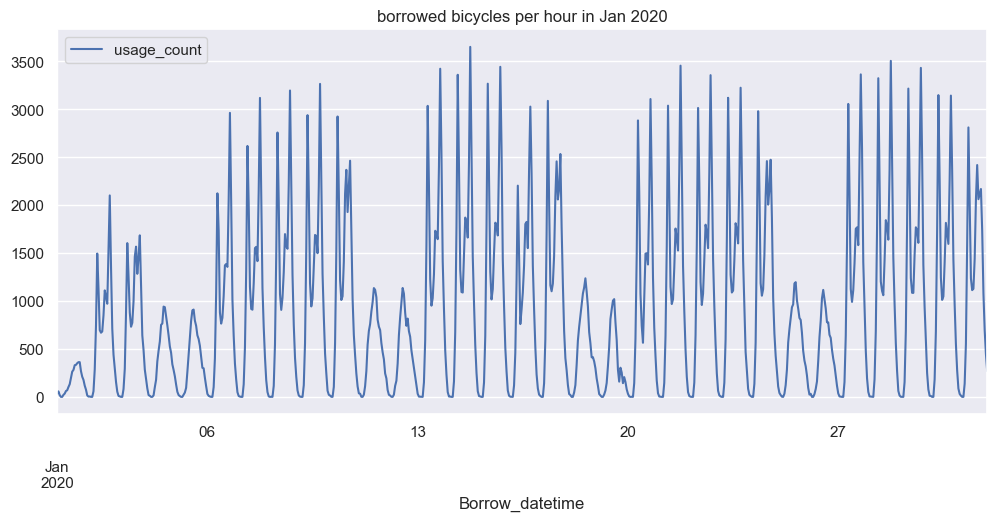

In [7]:
df_hour = pd.DataFrame(df_jan["Bicycle"].resample("H").count().rename("usage_count"))

df_hour.plot(title="borrowed bicycles per hour in Jan 2020", figsize=(12, 5))
plt.show()

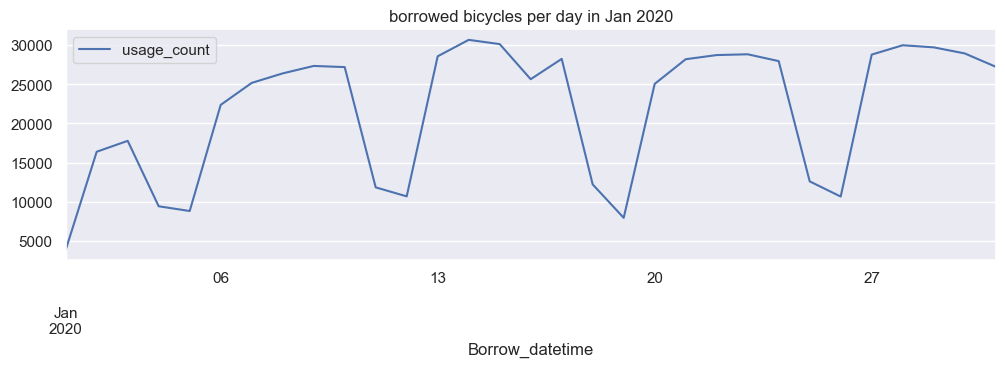

In [25]:
df_day = pd.DataFrame(df_jan["Bicycle"].resample("D").count().rename("usage_count"))

df_day.plot(title="borrowed bicycles per day in Jan 2020", figsize=(12, 3))
plt.show()

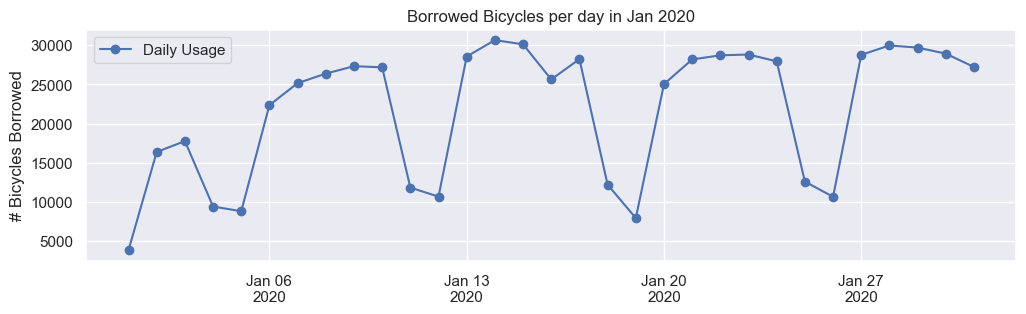

In [9]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(df_day["usage_count"], marker="o", linestyle="-", label="Daily Usage")
ax.set_ylabel("# Bicycles Borrowed")
ax.set_title("Borrowed Bicycles per day in Jan 2020")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d\n%Y"))
ax.legend()
plt.show()

In [65]:
df_jan_feb_day = pd.DataFrame(df["Bicycle"].resample("D").count().rename("usage_count"))
bicycle_data = df_jan_feb_day["usage_count"]

df_jan_feb_day.head()

,usage_count
Borrow_datetime,
2020-01-01,3854
2020-01-02,16374
2020-01-03,17766
2020-01-04,9417
2020-01-05,8812


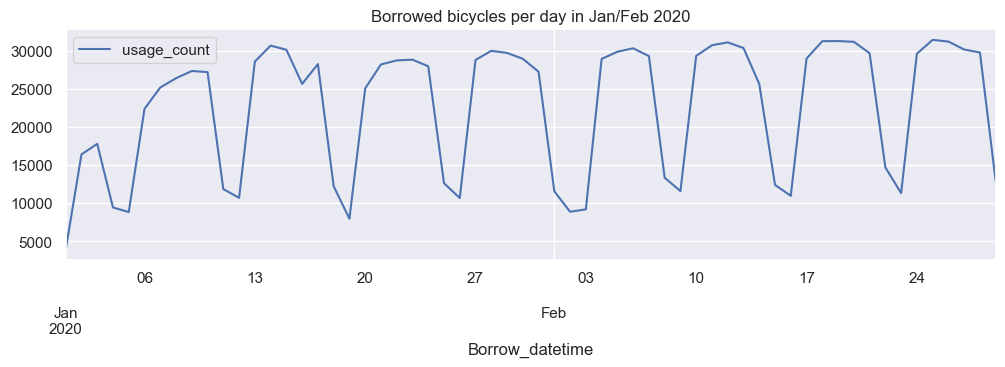

In [11]:
df_jan_feb_day.plot(title="Borrowed bicycles per day in Jan/Feb 2020", figsize=(12, 3))
plt.show()

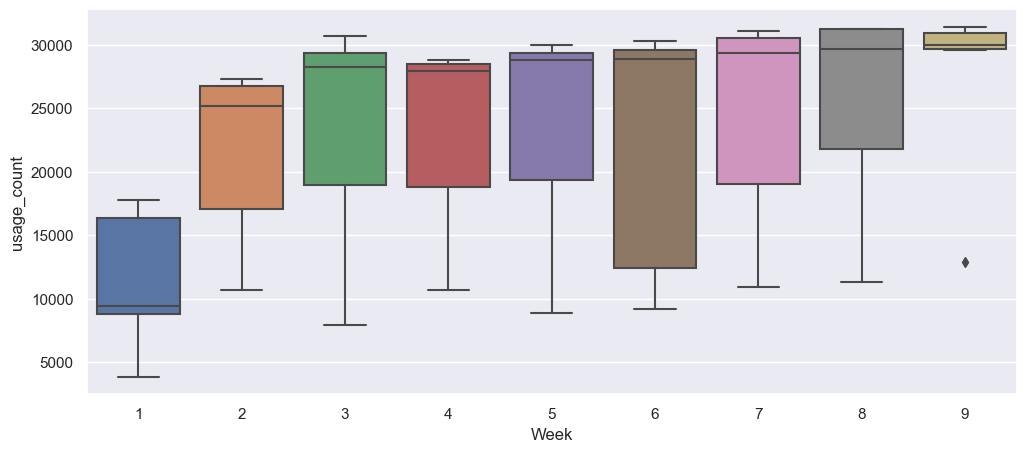

In [39]:
df_jan_feb_day["Year"] = df_jan_feb_day.index.year
df_jan_feb_day["Month"] = df_jan_feb_day.index.month
df_jan_feb_day["Week"] = df_jan_feb_day.index.isocalendar().week
df_jan_feb_day["Weekday"] = df_jan_feb_day.index.dayofweek
df_jan_feb_day["Weekday Name"] = df_jan_feb_day.index.day_name()

plt.rcParams["figure.figsize"] = (12, 5)
sns.boxplot(data=df_jan_feb_day, x="Week", y="usage_count")
plt.show()

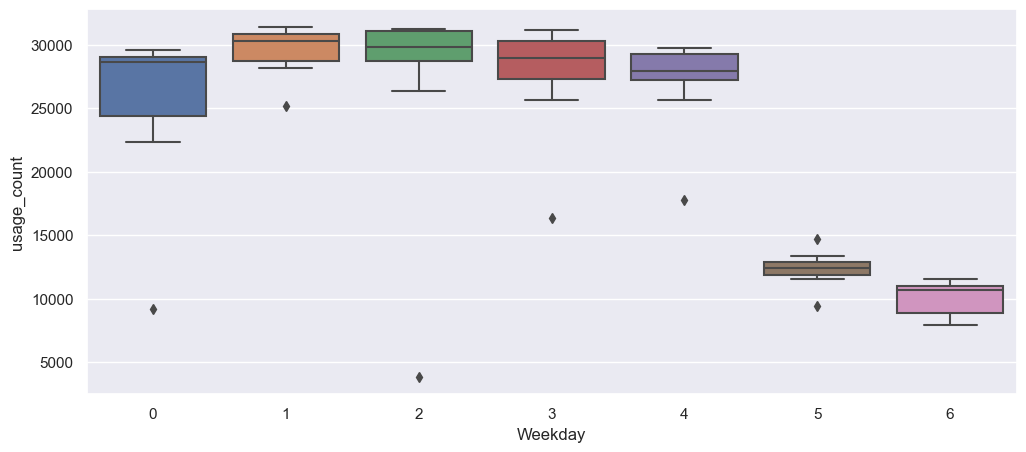

In [38]:
plt.rcParams["figure.figsize"] = (12, 5)
sns.boxplot(data=df_jan_feb_day, x="Weekday", y="usage_count")
plt.show()

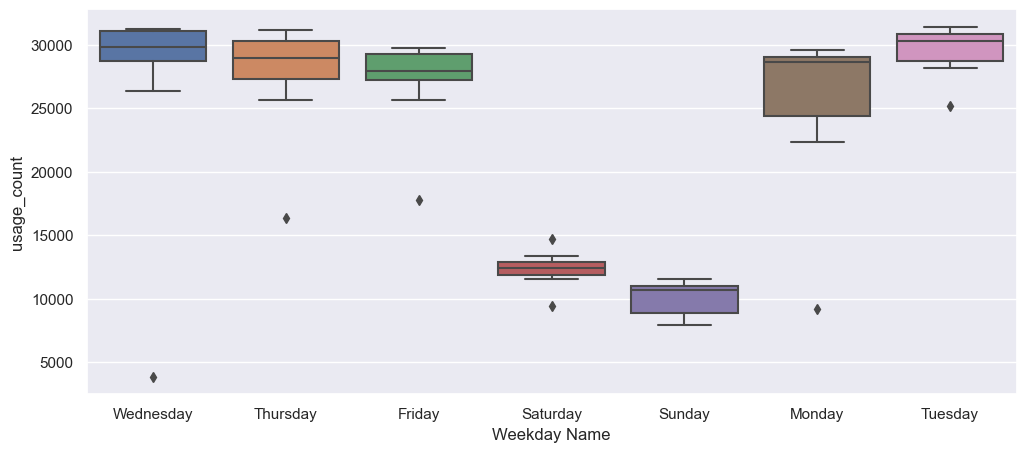

In [40]:
plt.rcParams["figure.figsize"] = (12, 5)
sns.boxplot(data=df_jan_feb_day, x="Weekday Name", y="usage_count")
plt.show()

In [15]:
dfp = df_jan_feb_day.pivot(index="Weekday", columns="Week", values="usage_count")
dfp

Week,1,2,3,4,5,6,7,8,9
Weekday,,,,,,,,,
0,NaN,22354.0,28554.0,25035.0,28770.0,9171.0,29307.0,28956.0,29588.0
1,NaN,25157.0,30650.0,28180.0,29963.0,28903.0,30699.0,31230.0,31405.0
2,3854.0,26373.0,30110.0,28711.0,29695.0,29850.0,31079.0,31247.0,31184.0
3,16374.0,27323.0,25631.0,28810.0,28922.0,30298.0,30335.0,31148.0,30138.0
4,17766.0,27176.0,28223.0,27941.0,27222.0,29279.0,25616.0,29658.0,29749.0
5,9417.0,11829.0,12205.0,12596.0,11535.0,13320.0,12376.0,14678.0,12860.0
6,8812.0,10681.0,7941.0,10655.0,8851.0,11566.0,10944.0,11298.0,NaN


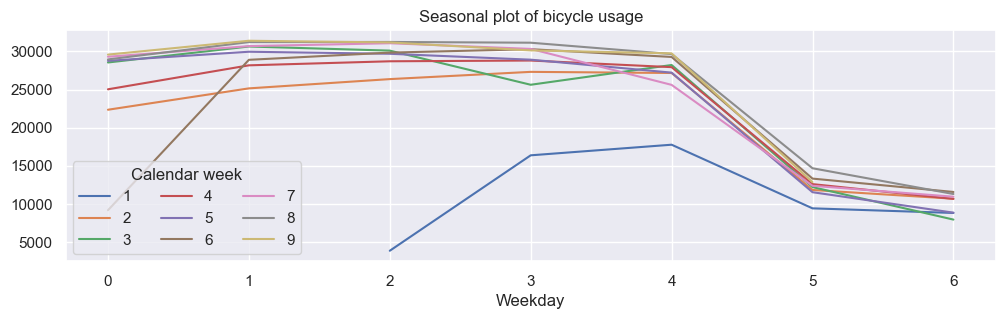

In [41]:
# all the weeks in a year, for every day of the week the count is teh same across the year
dfp.plot(title="Seasonal plot of bicycle usage", figsize=(12, 3))
plt.legend(title="Calendar week", loc="lower left", ncol=3)
plt.show()

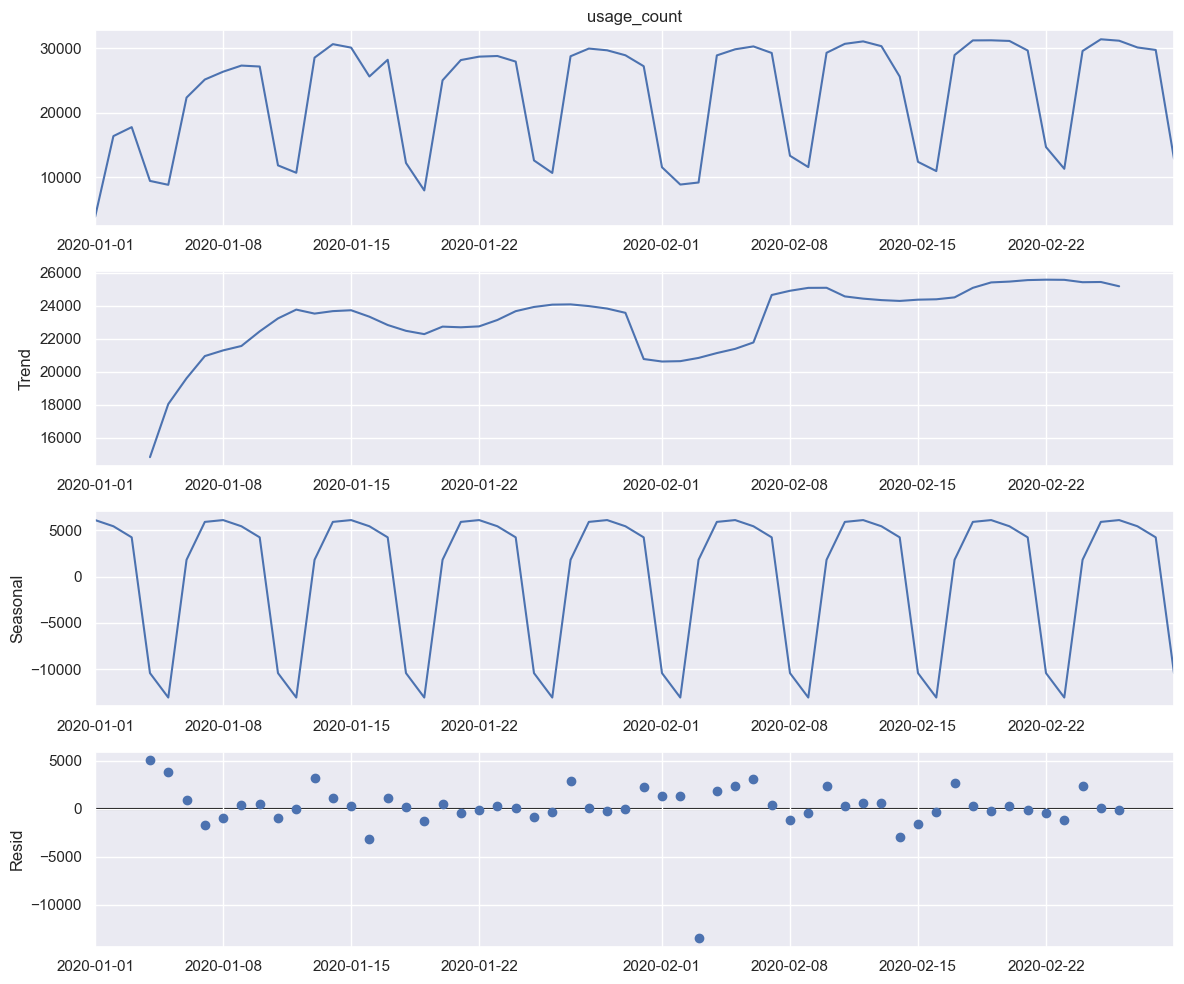

In [66]:
plt.rcParams["figure.figsize"] = (12, 10)
decompose = sm.tsa.seasonal_decompose(bicycle_data, model="additive", period=7)
decompose.plot()
plt.show()

## Autocorrelation
When the mean, variance/std and autocorrelation is constant then the series is stationary

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def acf_pacf_plot(y, lags=40):
    fig, ax = plt.subplots(1,2, figsize=(10, 3))
    plot_acf(y, lags=lags, ax=ax[0])
    plot_pacf(y, lags=lags, ax=ax[1], method='ywm')
    sns.despine()
    fig.tight_layout()
    return fig, ax


### White noise

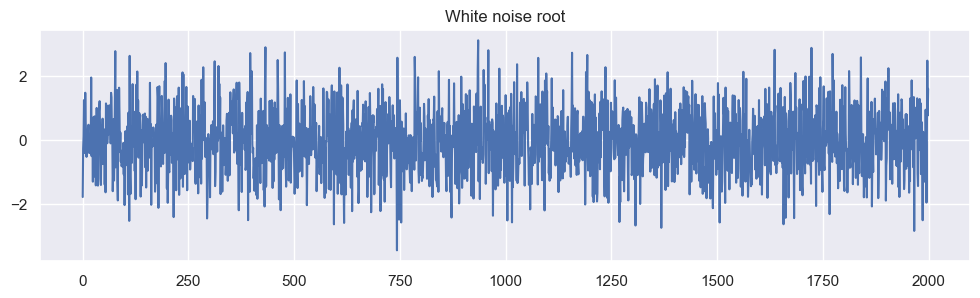

In [50]:
white_noise = pd.Series(np.random.randn(2000))
white_noise.plot(figsize=(12, 3), title="White noise root")
plt.show()

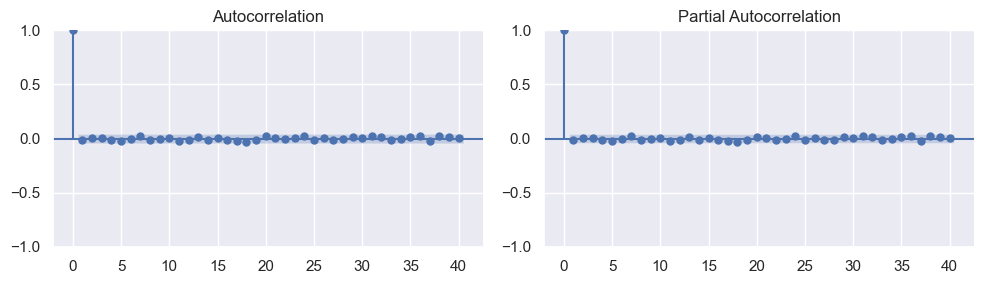

In [51]:
acf_pacf_plot(white_noise)
plt.show()

### Random walk

generate random values such that vi is dependent on vi-1

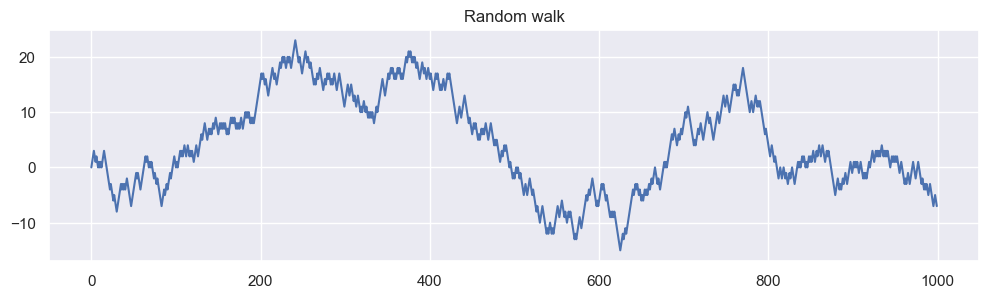

In [52]:
rw = [0]

num_steps = 1000
for i in range(1, num_steps):
    num = -1 if np.random.random() < 0.5 else 1
    rw.append(rw[-1] + num)
    
random_walk = pd.Series(rw)
random_walk.plot(figsize=(12, 3), title="Random walk")
plt.show()

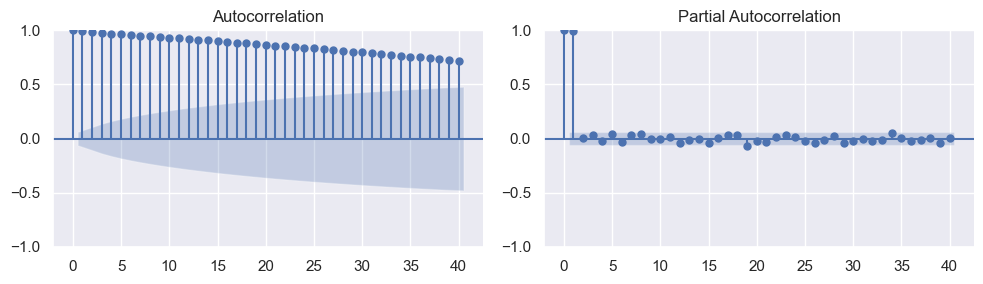

In [53]:
acf_pacf_plot(random_walk)
plt.show()

### Bicycle data

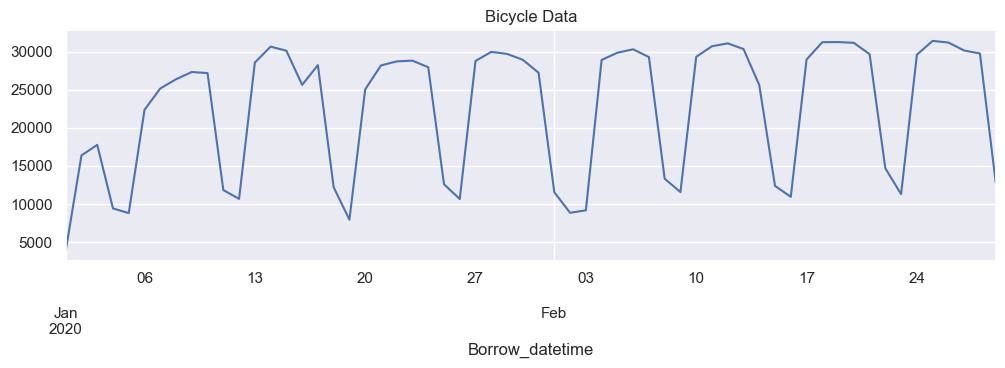

In [75]:
bicycle_data.plot(figsize=(12, 3), title="Bicycle Data")
plt.show()

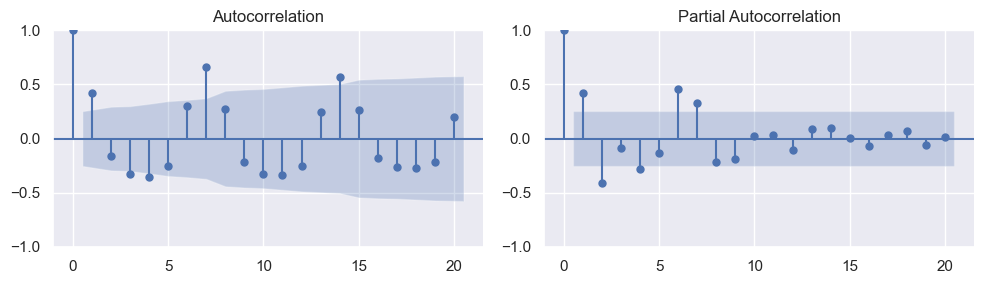

In [67]:
acf_pacf_plot(bicycle_data, lags=20)
plt.show()

## Stationary tests

In [58]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(ts, p=0.05, max_lag=None, regression="c"):
    """Augmented Dickey Fuller Test"""
    result = adfuller(ts, maxlag=max_lag, regression=regression)
    labels = ["ADF test statistics", "P-value", "# Lags used", "# Observations used"]
    
    print(f"Running ADF test with p-threshold {p}\n")
    for value, label in zip(result, labels):
        print(f"{label}: {str(value)}")
    print()
    
    if result[1] <= p:
        print("Reject the ADF null hypothesis. Time series is STATIONARY")
    else:
        print("cannot reject the ADF null hypothesis. Time series must be NON-STATIONARY")
        

def kpss_test(ts, p=0.05, n_lags="auto"):
    result = kpss(ts, nlags=n_lags)
    labels = ["KPSS test statistics", "P-value", "# lags used"]
    
    print(f"Running KPSS test with p-threshold {p}\n")
    for value, label in zip(result, labels):
        print(f"{label}: {str(value)}")
    print()
    
    if result[1] <= p:
        print("Reject the KPSS null hypothesis. Time series is be NON-STATIONARY")
    else:
        print("Cannot reject the KPSS null hypothesis. Time series must be STATIONARY")
        

#### Test white noise for stationarity

In [60]:
adf_test(white_noise)
print("\n---\n")
kpss_test(white_noise)

Running ADF test with p-threshold 0.05

ADF test statistics: -45.28669464369683
P-value: 0.0
# Lags used: 0
# Observations used: 1999

Reject the ADF null hypothesis. Time series is STATIONARY

---

Running KPSS test with p-threshold 0.05

KPSS test statistics: 0.1612840668736121
P-value: 0.1
# lags used: 7

Cannot reject the KPSS null hypothesis. Time series must be STATIONARY


/Users/abdulfatahadeneye/PycharmProjects/.venvs/getting-started-with-time-series-forcasting/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


#### Test random walk for stationarity

In [70]:
adf_test(random_walk)
print("\n---\n")
kpss_test(random_walk)

Running ADF test with p-threshold 0.05

ADF test statistics: -1.6449250184385797
P-value: 0.45968850317501747
# Lags used: 0
# Observations used: 999

cannot reject the ADF null hypothesis. Time series must be NON-STATIONARY

---

Running KPSS test with p-threshold 0.05

KPSS test statistics: 0.839901570380757
P-value: 0.01
# lags used: 20

Reject the KPSS null hypothesis. Time series is be NON-STATIONARY


/Users/abdulfatahadeneye/PycharmProjects/.venvs/getting-started-with-time-series-forcasting/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


#### Test Bicycle data for stationarity

In [79]:
adf_test(bicycle_data)
print("\n---\n")
kpss_test(bicycle_data)

Running ADF test with p-threshold 0.05

ADF test statistics: -2.2491923182839635
P-value: 0.18887806882388808
# Lags used: 8
# Observations used: 51

cannot reject the ADF null hypothesis. Time series must be NON-STATIONARY

---

Running KPSS test with p-threshold 0.05

KPSS test statistics: 0.2885203692719254
P-value: 0.1
# lags used: 1

Cannot reject the KPSS null hypothesis. Time series must be STATIONARY


/Users/abdulfatahadeneye/PycharmProjects/.venvs/getting-started-with-time-series-forcasting/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
